In [1]:
import pandas as pd

# Cargar el dataset
path = r'C:\Users\USUARIO\Documents\trabajos_realizados\Maria Celeste\Anexo 4 - Dataset Red Wine Quality\winequality-red.csv'
wine_df = pd.read_csv(path, sep=';')  # Nota: el separador es ';'

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(wine_df.head())

# Información del dataset
print("\nInformación del dataset:")
print(wine_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(wine_df.describe())


Primeras filas del dataset:
  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                               
1  7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0....                                                                                               
2  7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0...                                                                                               
3  11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,...                                                                                               
4  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                               

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 ent

In [3]:
import pandas as pd

# Cargar el dataset
path = r'C:\Users\USUARIO\Documents\trabajos_realizados\Maria Celeste\Anexo 4 - Dataset Red Wine Quality\winequality-red.csv'
wine_df = pd.read_csv(path, sep=',')  # Cambié el separador a ','

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(wine_df.head())

# Información del dataset
print("\nInformación del dataset:")
print(wine_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(wine_df.describe())


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. Seleccionar características y variable objetivo
X = wine_df.drop('quality', axis=1)  # Todas las columnas excepto 'quality'
y = wine_df['quality']  # Variable objetivo

# 2. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}, {y_test.shape}")

# 3. Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)


Dimensiones del conjunto de entrenamiento: (1439, 11), (1439,)
Dimensiones del conjunto de prueba: (160, 11), (160,)
Matriz de confusión:
[[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 1  5 41 20  1  0]
 [ 0  3 14 42  7  0]
 [ 0  0  0  9  8  1]
 [ 0  0  1  1  1  1]]
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.68      0.60      0.64        68
           6       0.58      0.64      0.61        66
           7       0.47      0.44      0.46        18
           8       0.50      0.25      0.33         4

    accuracy                           0.57       160
   macro avg       0.37      0.32      0.34       160
weighted avg       0.60      0.57      0.58       160



In [7]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
dt = DecisionTreeClassifier(random_state=42)

# Definir los parámetros a ajustar
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados de la búsqueda
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor puntuación: 0.6157278358497871


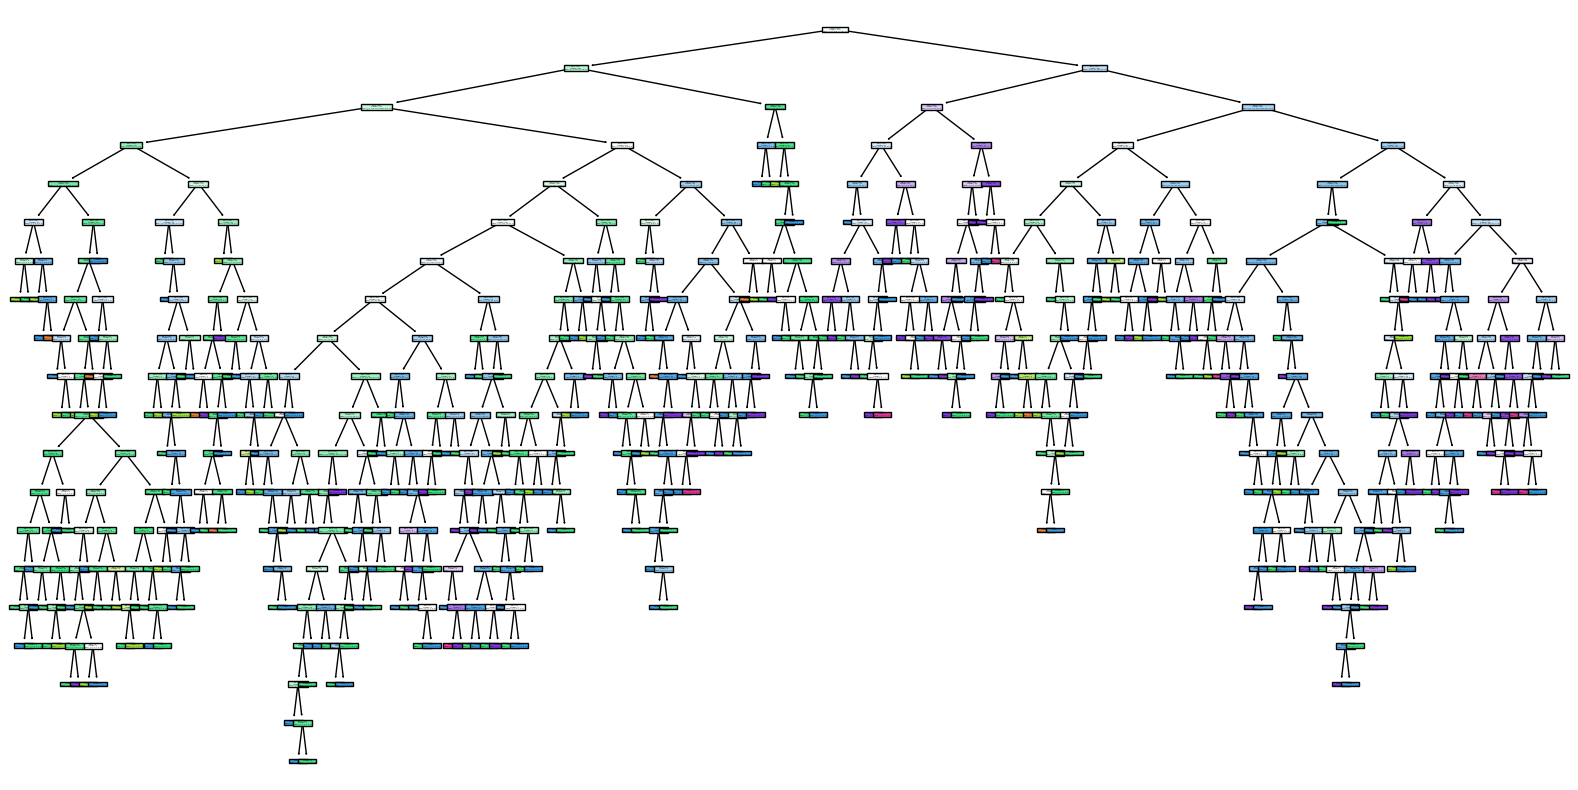

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=X_train.columns)
plt.show()


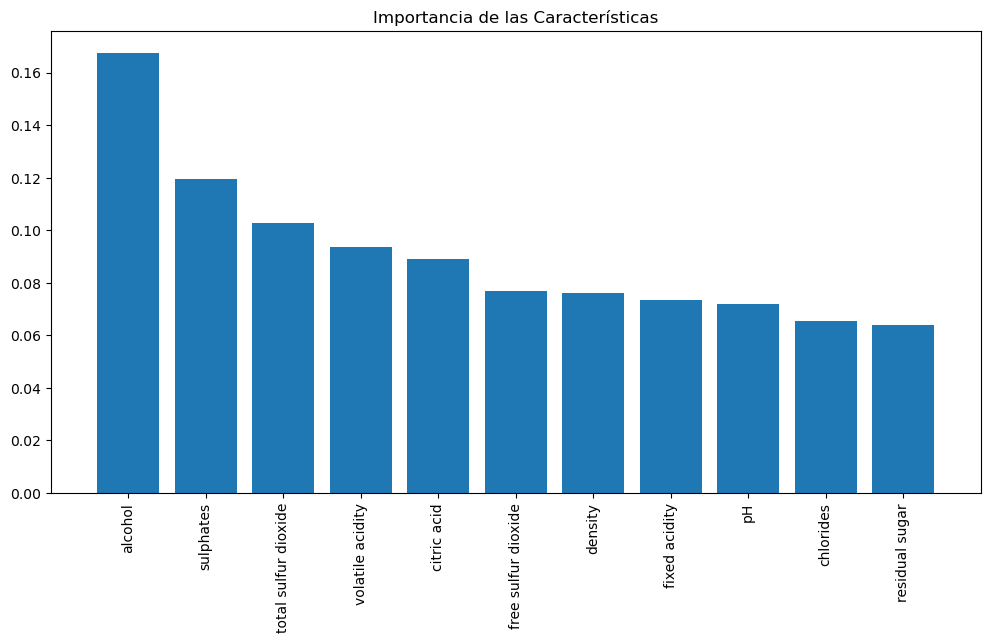

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tu modelo se llama 'model' y que 'X_train' es el conjunto de entrenamiento

# Obtener la importancia de las características
importancia = model.feature_importances_

# Crear un gráfico de barras
caracteristicas = X_train.columns  # Suponiendo que X_train es un DataFrame de pandas
indices = np.argsort(importancia)[::-1]  # Ordenar las características por importancia

# Visualizar
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train.shape[1]), caracteristicas[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Crear un nuevo modelo con poda (limitando la profundidad)
model_podado = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Entrenar el modelo
model_podado.fit(X_train, y_train)

# Evaluar el rendimiento
y_pred_podado = model_podado.predict(X_test)

# Generar las métricas de rendimiento
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusión (modelo podado):\n", confusion_matrix(y_test, y_pred_podado))
print("\nReporte de clasificación (modelo podado):\n", classification_report(y_test, y_pred_podado))


Matriz de confusión (modelo podado):
 [[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 58 10  0  0]
 [ 0  0 36 28  2  0]
 [ 0  0  2 16  0  0]
 [ 0  0  0  3  1  0]]

Reporte de clasificación (modelo podado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.58      0.85      0.69        68
           6       0.49      0.42      0.46        66
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00         4

    accuracy                           0.54       160
   macro avg       0.18      0.21      0.19       160
weighted avg       0.45      0.54      0.48       160



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
